In [204]:
%matplotlib inline

import numpy as np
import sympy as sp
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import linregress

smallest_positive_number = np.finfo(dtype='float')

sp.init_printing()

input_data = 'res_raw.pkl'

Load right hand side of ode system

In [205]:
rhs = np.load(input_data)

Define symbols for dynamic variables

In [206]:
mucc, mucd, mudc, mudd = sp.symbols('mu_c^c mu_c^d mu_d^c mu_d^d', positive=True, real=True)
x, y, z, k = sp.symbols('x y z k')
c, g, p, g0 = sp.symbols('c, g, p, g_0')

Define symbols for parameters

In [207]:
bc, bd, bR, g0, e, delta, rs, xi, p, k, epsilon, phi, tau, pi, N = sp.symbols('b_c b_d b_R g_0 e delta s xi p k epsilon phi tau, pi, N')

Set values for parameters and substitute them into the right hand side of the ode system

In [208]:
N_val = 100
p_net = 0.125
alpha = 0.1
e_val = 100.
t_g = 100.
r_s = 0.23
b_c = 0.5
b_d = 1.2
d_c = 0.06
p_val = 5.
g_0 = 1.
params = {bc: b_c, bd: b_d, 
          bR: alpha**2 * e_val, 
          g0: g_0,
          e: e_val, delta: 0.06,
          rs: r_s, pi: 0.5,
          N: 1., p: p_val,
          xi: 1./4, p: p_val, 
          k: p_net * N_val, epsilon: 0.05, 
          phi: 0.8, tau: 1.}
variables = [x, y, z, mucc, mucd, mudc, mudd, c, g]

In [209]:
rhs = rhs.subs(params)

In [210]:
def dot_S(values, t):
    variables = [x, y, z, mucc, mucd, mudc, mudd, c, g]
    if values[-1] < alpha * g_0:
        values[-1] = alpha * g_0
    # add to g such that 1 - alpha**2 * (g/g_0)**2 remains positive
    subs1 = {var: val for (var, val) in zip(variables, values)}
    print t, 1 - alpha*(g_0/values[-1]), values[-1]
    return list(rhs.subs(subs1).evalf())

In [211]:
t = np.linspace(0, 20, 100)
initial_conditions = [0, 0, 0, 1, 1, 1, 1, 1, g_0]
trajectory = odeint(dot_S, initial_conditions, t)

0.0 0.9 1.0
2.44507980355e-05 0.899999939529 0.999999395292
2.44507980355e-05 0.899999939529 0.99999939529
4.8901596071e-05 0.899999879058 0.99999879058
4.8901596071e-05 0.899999879058 0.999998790578
0.00261762305784 0.89999352471 0.999935251289
0.00261762305784 0.899993524709 0.999935251287
0.00518634451961 0.899987167511 0.999871691577
0.00518634451961 0.899987167511 0.999871691572
0.00775506598138 0.89998080746 0.99980811143
0.00775506598138 0.89998080746 0.999808111425
0.0233654497359 0.899942095342 0.999421288525
0.0233654497359 0.899942095336 0.999421288456
0.0173360499028 0.899957060141 0.999570785715
0.0173360499028 0.899957060138 0.999570785689
0.00967126276567 0.899976061175 0.999760669044
0.00967126276567 0.899976061175 0.999760669043
0.01158745955 0.899971313301 0.99971321528
0.01158745955 0.899971313301 0.999713215281
0.0135036563343 0.899966563838 0.999665750137
0.0135036563343 0.899966563838 0.999665750137
0.0154198531186 0.899961812783 0.999618273605
0.0154198531186 0.8

In [212]:
res = {'parameters': params,
       'variables': variables,
       'initial conditions': initial_conditions,
       'trajectory': trajectory}

with open('analytic_trajectory.pkl', 'wb') as outf:
    pkl.dump(res, outf)

In [213]:
slope = linregress(t, trajectory[:,8])
slope

In [214]:
t_0 = -slope[1]/slope[0]

In [215]:
t_0

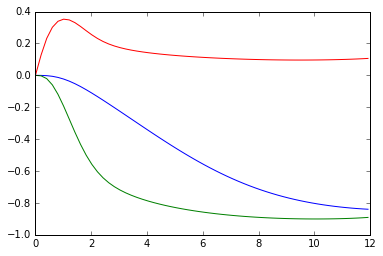

In [216]:
tmax = 40
plt.plot(t[0:-tmax], trajectory[0:-tmax,0:3])

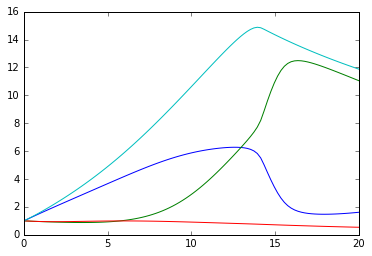

In [217]:
plt.plot(t, trajectory[:,3:7])

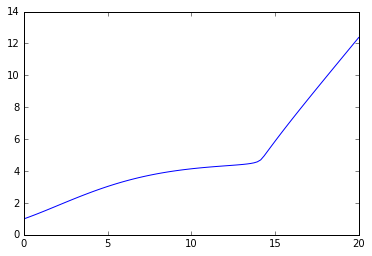

In [218]:
plt.plot(t, trajectory[:,7])

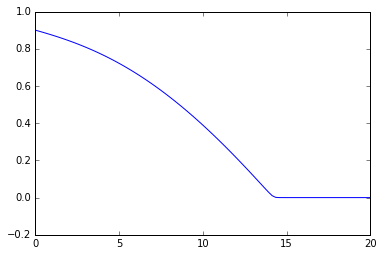

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[:], trajectory[:,8] - alpha)
